# Perceptron Learning
-----------------------

## Data Generation

Generate and return data samples, including their labels, given the number of samples, the means (mu), and standard deviations (sigma) of positive (pos) and negative (neg) data.

In [2]:
import numpy as np

def dataset(number_of_samples, mu_pos, sigma_pos, mu_neg, sigma_neg):
  # create positive and negative data
  positive_data = np.random.normal(mu_pos, sigma_pos, size=(number_of_samples//2, 2))
  negative_data = np.random.normal(mu_neg, sigma_neg, size=(number_of_samples//2, 2))

  # assign positive and negative labels
  positive_labels = np.full(number_of_samples//2, 1, int)
  negative_labels = np.full(number_of_samples//2, -1, int)

  # concatenate positive and negative data
  all_data = np.concatenate((positive_data, negative_data), axis=0) 
  all_labels = np.concatenate((positive_labels, negative_labels))

  # anything else to consider?
  # shuffle the data?

  # return both X and T
  return all_data, all_labels

## Select Data Parameters and Line Parameters


The goal is to select data points such that we exactly know where the ideal separating line should be placed.
Since the data samples are not always separable due to being generated randomly, the means and standard deviations
are predefined.

A seperating line is defined using the cartesian equation: $w_0 + w_1 x_1 + w_2 x_2$.
The separating line is orthogonal to the vector $\overrightarrow{\vec\mu_- \vec\mu_+}$ and the normal of the line $(w_1, w_2)^T$ is orthogonal to the line. The $w_0$ value is selected to be such that the line $\vec w$ is in the middle of $\vec\mu_+$ and $\vec\mu_-$.

In [3]:
number_of_samples=100
mu_pos=np.array([1,7])
sigma_pos=np.array([1,1])
mu_neg=np.array([5,2])
sigma_neg=np.array([1,1])

X, T = dataset(number_of_samples, mu_pos,sigma_pos,mu_neg,sigma_neg)
w_manual = np.array([-np.sum(((mu_pos+mu_neg)/2)*(mu_pos-mu_neg))]+list(mu_pos-mu_neg))

In [4]:
w_manual

array([-10.5,  -4. ,   5. ])

## Linear Separability Test

A line $a = f_{\vec w}(\vec x) = w_0 + w_1 x_1 + w_2 x_2$ linearly separates the data $(X,T)$ if $\forall n: a^{[n]} t^{[n]} > 0$ for $a^{[n]} = f_{\vec w}(\vec x^{[n]})$.
Following is a test function that implements the above linear seperability test. The test is applied to the data $(X,T)$ and the manually selected line $\vec w$.

In [5]:
def separability_test(X, T, w):
  res = np.multiply(X.dot(w[1:]) + w[0], T)
  return all(i > 0 for i in res)

# check that the weights are separating the data
if separability_test(X, T, w_manual):
  print("The data is separated by the manually selected line")
else:
  print("The manually selected line does not separate the data")

The data is separated by the manually selected line


## Perceptron

The perceptron is defined as the line $a = f_{\vec w}(\vec x)$ that is thresholded using the sign function $\mathrm{sign}(a) = \begin{cases} +1 &\text{if } a \geq 0\\ -1 & \text{otherwise.}\end{cases}$


A function that computes and returns the perceptron for a given data point $\vec x$ and line parameters $\vec w$ is implemented below.

In [17]:
def perceptron(x, w):
  return np.sign(np.dot(x, w[1:]) + w[0])

The perceptron learning rule is defined as follows.
First, the weights $\vec w = (w_0, w_1, w_2)^T$ is initialized randomly.
Then, for each sample $(x,t)$ of the dataset we check if the sample is correcly classified as $H(f_{\vec w}(\vec x)) t > 0$.
If the sample is classified incorrectly, the weights are adapted: $w_0 = w_0 + t$, $w_1 = w_1 + tx_1$, $w_2 = w_2 + tx_2$.
This step is repeated until all samples are classified correcly.


## Perceptron Learning Implementation

Following is an implementation of a funtion that performs perceptron learning for a given dataset $(X,T)$ and a given initial weight vector $\vec w$.
The final weight vector $\vec w^*$ is returned from that function, and a stopping criterion for the iteration is defined.

In [6]:
def perceptron_learning(X, T, w):
  # make a copy of your weights
  w_star = w.copy()

  epochs = 0
  # iterate over the data and perform perceptron learning
  while separability_test(X, T,w_star)==False:
    for x,t in zip(X,T):
      if perceptron(x,w_star)*t<0:
        w_star+=t*np.array([1,x[0],x[1]])
        # iterate over the data and perform perceptron learning
    epochs += 1
  
  # return the optimal weights
  return w_star

## Test Expected Outcome

In [7]:
w_star = perceptron_learning(X, T, w_manual)

# check if the output is as expected
if np.linalg.norm(w_star-np.array(w_manual))<=0.0001:
  print("Excepted outcome equals actual outcome.")
else:
  print("Excepted outcome doesn't equal actual outcome.")

Excepted outcome equals actual outcome.



## Weight Initialization

A function that generates and returns randomly initialized weights $\vec w \in [-1,1]^3$ is implemented below.

In [8]:
def random_weights(min = -1, max = 1):
  return np.random.uniform(min,max,size=(3,))


## Perceptron Learning Execution

The perceptron learning function is run with the data and the randomly generated initial weight vector. The resulting weight vector $\vec w^*$ is stored.

In [9]:
# create random weights
w_initial = random_weights()

# perform perceptron learning
w_star = perceptron_learning(X, T, w_initial)

## Result Validation

Verify that $\vec w^*$ separates the data.

In [10]:
if separability_test(X, T, w_star):
  print("The data is separated by the optimized selected line")
else:
  print("The optimized selected line does not separate the data")

The data is separated by the optimized selected line


## Visualization

For visualization, the positive and negative data along with the descision boundaries of the weight vectors are jointly plotted. Positive data are plotted with green dots, and negative data with red dots.

Line parameters are computed by defining the separating line in cartesian coordinates $f_{\vec w}(\vec x) = 0$ and solve it to the paramteric form $x_2 = \beta x_1 + \gamma$.

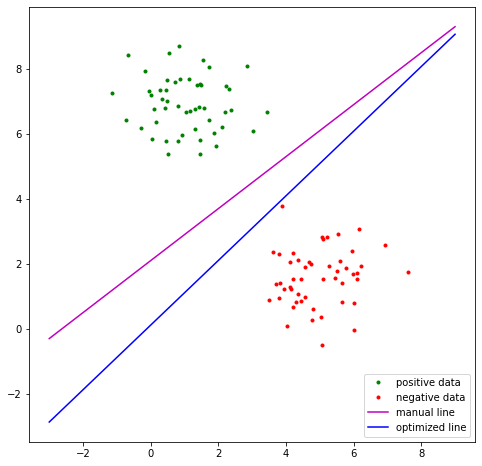

In [23]:
def line_parameters(w):
  # compute parametric line parameters from cartesian coordinates
  beta = - w[1] / w[2]
  gamma = - w[0] / w[2]
  return beta, gamma


from matplotlib import pyplot
pyplot.figure(figsize=(8,8))

# plot the positive data points
pyplot.plot(X[T==1, 0], X[T==1, 1], "g.", label="positive data")
# plot the negative data points
pyplot.plot(X[T==-1, 0], X[T==-1, 1], "r.", label="negative data")

# define positions where to evaluate the line:
x1 = np.array([-3, 9])

# compute line parameters for manual line
beta, gamma = line_parameters(w_manual)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot lines (might need to call this function twice for the two lines)
pyplot.plot(x1, x2, "m-", label="manual line")

# compute line parameters for optimized line
beta, gamma = line_parameters(w_star)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot lines (might need to call this function twice for the two lines)
pyplot.plot(x1, x2, "b-", label="optimized line")

# make the plot more beautiful
pyplot.legend()

